# LEHD Origin-Destination Employment Statistics - Quick Start

© 2025 KR-Labs. All rights reserved.  
**Part of the KR-Labs Analytics Suite**

---

## Overview

The **LEHD (Longitudinal Employer-Household Dynamics)** connector provides access to origin-destination employment data showing where people live and work.

**What is LEHD?**
- Worker employment flows between home and workplace
- Job characteristics by origin and destination
- Worker demographics (age, earnings, industry)
- Block-level geographic resolution
- No API key required!

**Use Cases:**
-  Commuting pattern analysis
-  Labor market geography
-  Workforce characteristics
-  Regional employment dynamics
-  Economic impact studies

**API Information:**
- Source: U.S. Census Bureau LEHD
- API Key: **Not required** (public data)
- Data Format: CSV → pandas DataFrame
- Geographic Level: Census blocks

## 1. Setup and Installation

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from krl_data_connectors import LEHDConnector

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print(" Setup complete!")
print(" LEHD connector does not require an API key")

✅ Setup complete!
💡 LEHD connector does not require an API key


## 2. Initialize Connector

No API key needed - LEHD data is publicly accessible!

In [2]:
# Initialize LEHD connector
lehd = LEHDConnector()

print(" LEHD connector initialized")
print(f"   Base URL: {lehd.BASE_URL}")

{"timestamp": "2025-10-19T21:39:30.780304Z", "level": "WARNING", "name": "LEHDConnector", "message": "No API key provided", "source": {"file": "base_connector.py", "line": 72, "function": "__init__"}, "levelname": "WARNING", "taskName": "Task-19", "connector": "LEHDConnector"}
{"timestamp": "2025-10-19T21:39:30.780552Z", "level": "INFO", "name": "LEHDConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19", "connector": "LEHDConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": false}
{"timestamp": "2025-10-19T21:39:30.780772Z", "level": "INFO", "name": "LEHDConnector", "message": "Initialized LEHD connector", "source": {"file": "lehd_connector.py", "line": 83, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19"}
✅ LEHD connector initialized
   Base URL: https://lehd.ces.census.gov/data/lodes/LODES7
{"timestamp": "2025-10-19T21:39:30.780552

## 3. Basic Usage: Origin-Destination Data

Get employment flows showing where workers live and work.

In [3]:
# Get origin-destination data for Rhode Island
# LEHD data has ~2 year publication lag, so try recent years
years_to_try = [2020, 2019, 2018, 2017]
ri_od = None
data_year = None

print(" Searching for available LEHD data...")
for year in years_to_try:
    try:
        ri_od = lehd.get_od_data(
            state='ri',
            year=year,
            job_type='JT00',  # All jobs
            segment='S000'     # All workers
        )
        data_year = year
        print(f" Successfully loaded data for {year}")
        break
    except Exception as e:
        print(f"  {year} data not available, trying earlier year...")
        continue

if ri_od is None:
    raise RuntimeError("Could not find LEHD data for any recent year")

print(f"\n Retrieved {len(ri_od):,} origin-destination pairs for {data_year}")
print(f" Total jobs: {ri_od['S000'].sum():,}")
print("\n" + "="*80)
print("Sample Data (top 10 employment flows):")
print("="*80)
print(ri_od.nlargest(10, 'S000')[['w_geocode', 'h_geocode', 'S000', 'SA01', 'SA02', 'SA03']])

🔍 Searching for available LEHD data...
{"timestamp": "2025-10-19T21:39:30.785588Z", "level": "INFO", "name": "LEHDConnector", "message": "Fetching LEHD OD data: state=ri, year=2020, part=main, job_type=JT00, segment=S000", "source": {"file": "lehd_connector.py", "line": 189, "function": "get_od_data"}, "levelname": "INFO", "taskName": "Task-21"}
{"timestamp": "2025-10-19T21:39:30.858658Z", "level": "ERROR", "name": "LEHDConnector", "message": "Failed to fetch OD data: HTTP Error 404: Not Found", "source": {"file": "lehd_connector.py", "line": 207, "function": "get_od_data"}, "levelname": "ERROR", "taskName": "Task-21"}
⚠️  2020 data not available, trying earlier year...
{"timestamp": "2025-10-19T21:39:30.859263Z", "level": "INFO", "name": "LEHDConnector", "message": "Fetching LEHD OD data: state=ri, year=2019, part=main, job_type=JT00, segment=S000", "source": {"file": "lehd_connector.py", "line": 189, "function": "get_od_data"}, "levelname": "INFO", "taskName": "Task-21"}
{"timestamp"

## 4. Understanding LEHD Data Structure

**Key Columns:**
- `w_geocode` - Workplace census block code
- `h_geocode` - Home census block code
- `S000` - Total number of jobs

**Worker Age Segments:**
- `SA01` - Age 29 or younger
- `SA02` - Age 30 to 54
- `SA03` - Age 55 or older

**Earnings Segments:**
- `SE01` - $1250/month or less
- `SE02` - $1251 to $3333/month
- `SE03` - Greater than $3333/month

In [4]:
# Analyze worker demographics
print(" Worker Age Distribution:")
print("="*80)
print(f"  Age 29 or younger: {ri_od['SA01'].sum():,} ({100*ri_od['SA01'].sum()/ri_od['S000'].sum():.1f}%)")
print(f"  Age 30 to 54:      {ri_od['SA02'].sum():,} ({100*ri_od['SA02'].sum()/ri_od['S000'].sum():.1f}%)")
print(f"  Age 55 or older:   {ri_od['SA03'].sum():,} ({100*ri_od['SA03'].sum()/ri_od['S000'].sum():.1f}%)")

print("\n Earnings Distribution:")
print("="*80)
print(f"  $1250/month or less:     {ri_od['SE01'].sum():,} ({100*ri_od['SE01'].sum()/ri_od['S000'].sum():.1f}%)")
print(f"  $1251 to $3333/month:    {ri_od['SE02'].sum():,} ({100*ri_od['SE02'].sum()/ri_od['S000'].sum():.1f}%)")
print(f"  Greater than $3333/month: {ri_od['SE03'].sum():,} ({100*ri_od['SE03'].sum()/ri_od['S000'].sum():.1f}%)")

👥 Worker Age Distribution:
  Age 29 or younger: 90,336 (22.2%)
  Age 30 to 54:      205,351 (50.6%)
  Age 55 or older:   110,365 (27.2%)

💰 Earnings Distribution:
  $1250/month or less:     90,716 (22.3%)
  $1251 to $3333/month:    133,773 (32.9%)
  Greater than $3333/month: 181,563 (44.7%)


## 5. Residence Area Characteristics (RAC)

Analyze characteristics of workers by where they live.

In [5]:
# Get RAC data (where workers live) - use same year as OD data
ri_rac = lehd.get_rac_data(
    state='ri',
    year=data_year,  # Use the year that worked for OD data
    segment='S000'
)

print(f" Retrieved RAC data for {len(ri_rac):,} census blocks ({data_year})")
print(f" Total workers living in RI: {ri_rac['C000'].sum():,}")
print("\n" + "="*80)
print("Top 10 Census Blocks by Worker Count:")
print("="*80)

# Dynamic column selection - RAC uses different column names than OD
display_cols = ['C000', 'CA01', 'CA02', 'CA03']
# Find the geocode column (might be 'geocode', 'w_geocode', or similar)
geo_col = None
for col in ri_rac.columns:
    if 'geocode' in col.lower():
        geo_col = col
        display_cols.insert(0, geo_col)
        break

if geo_col:
    print(ri_rac.nlargest(10, 'C000')[display_cols])
else:
    # If no geocode column found, just show the data columns
    print(ri_rac.nlargest(10, 'C000')[['C000', 'CA01', 'CA02', 'CA03']])

{"timestamp": "2025-10-19T21:39:31.583843Z", "level": "INFO", "name": "LEHDConnector", "message": "Fetching LEHD RAC data: state=ri, year=2019, segment=S000, job_type=JT00", "source": {"file": "lehd_connector.py", "line": 238, "function": "get_rac_data"}, "levelname": "INFO", "taskName": "Task-25"}
{"timestamp": "2025-10-19T21:39:31.839401Z", "level": "INFO", "name": "LEHDConnector", "message": "Retrieved 17,252 RAC records", "source": {"file": "lehd_connector.py", "line": 247, "function": "get_rac_data"}, "levelname": "INFO", "taskName": "Task-25"}
📊 Retrieved RAC data for 17,252 census blocks (2019)
💼 Total workers living in RI: 509,945

Top 10 Census Blocks by Worker Count:
             h_geocode  C000  CA01  CA02  CA03
6613   440070024001007   742   173   366   203
4269   440050403032005   701   155   334   212
8904   440070114015017   571    94   345   132
10449  440070125002000   555   137   266   152
13057  440070146003001   535    94   282   159
9930   440070121031000   527   1

## 6. Visualization: Age Distribution

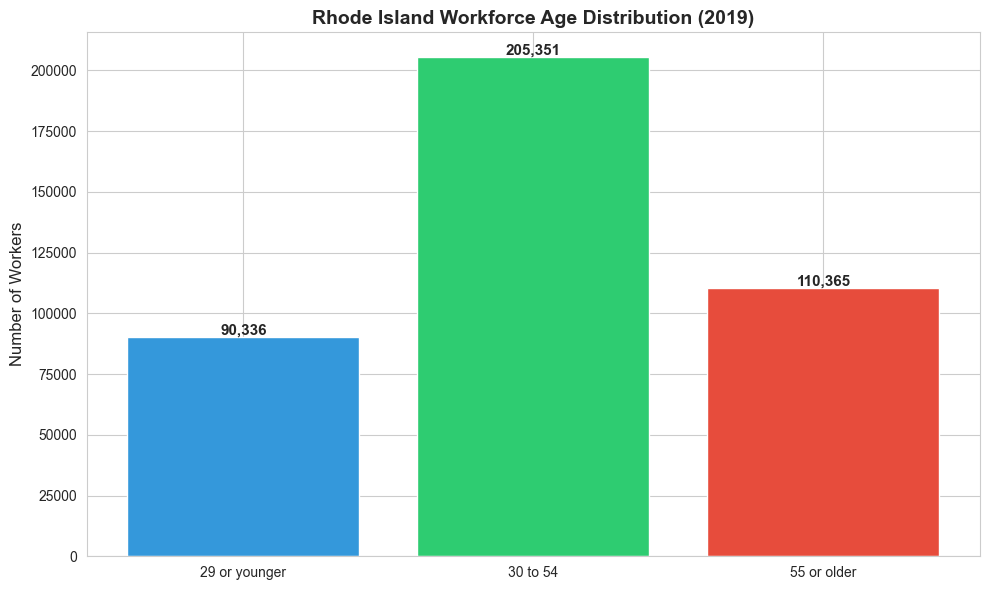

💡 Insight: 30 to 54 workers dominate the workforce


In [6]:
# Create age distribution visualization
age_data = {
    'Age Group': ['29 or younger', '30 to 54', '55 or older'],
    'Workers': [ri_od['SA01'].sum(), ri_od['SA02'].sum(), ri_od['SA03'].sum()]
}
age_df = pd.DataFrame(age_data)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c']
ax.bar(age_df['Age Group'], age_df['Workers'], color=colors)
ax.set_ylabel('Number of Workers', fontsize=12)
ax.set_title(f'Rhode Island Workforce Age Distribution ({data_year})', fontsize=14, fontweight='bold')
ax.ticklabel_format(style='plain', axis='y')
for i, v in enumerate(age_df['Workers']):
    ax.text(i, v + 1000, f'{int(v):,}', ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

print(f" Insight: {age_df.iloc[age_df['Workers'].idxmax()]['Age Group']} workers dominate the workforce")

## 7. Next Steps & Resources

**Learn More:**
-  [LEHD Documentation](https://lehd.ces.census.gov/data/lodes/LODES7/)
-  [LEHD OnTheMap](https://onthemap.ces.census.gov/)
-  [Full krl-data-connectors Documentation](https://docs.krlabs.dev/data-connectors)

**Try These Examples:**
- Compare commuting patterns across multiple years
- Analyze WAC (Workplace Area Characteristics) data
- Calculate average commute distances
- Combine with CBP data for comprehensive regional analysis

**Need Help?**
- GitHub Issues: https://github.com/KR-Labs/krl-data-connectors/issues
- Documentation: https://docs.krlabs.dev
- Email: support@krlabs.dev